# Lab 4

Wilfredo Gallegos 20399


Paulo Sánchez 21401

In [1]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Limpieza de Datos
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
# Cargar stopwords en inglés
stop_words = set(stopwords.words('spanish'))

#Analisis de Co-Ocurrencias
import networkx as nx
from itertools import combinations
from collections import Counter

#Libreria poderosa de NLP
import spacy
from collections import Counter

#Clustering de Documentos
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from textblob.sentiments import NaiveBayesAnalyzer
import string


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raule\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raule\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
spacy.cli.download("es_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
nlp = spacy.load("es_core_news_sm")
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
tweets_Bernardo=pd.read_csv("bernardoArevalo.csv")
tweets_Bernardo.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1702109621899407575,1702109621899407575,https://twitter.com/eltuitdehoy_/status/170210...,2023-09-13 23:58:52+00:00,"{'id': 46561608, 'id_str': '46561608', 'url': ...",es,@AnonGTReloaded @msemillagt @BArevalodeLeon ja...,0,0,...,NaN,NaN,NaN,1.702089e+18,"{'id': 1419402501212811265, 'username': 'AnonG...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1702109505947865192,1702109505947865192,https://twitter.com/totitafuentes/status/17021...,2023-09-13 23:58:24+00:00,"{'id': 1005627722, 'id_str': '1005627722', 'ur...",es,@ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...,0,1,...,NaN,NaN,NaN,1.702056e+18,"{'id': 291888009, 'username': 'ASIERVERA', 'di...","<a href=""http://twitter.com/#!/download/ipad"" ...",http://twitter.com/#!/download/ipad,Twitter for iPad,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",2,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1702109134387134664,1702109134387134664,https://twitter.com/Fernand0483/status/1702109...,2023-09-13 23:56:55+00:00,"{'id': 1512621569834688513, 'id_str': '1512621...",es,@VicZacariasGT @soy_502 @BArevalodeLeon @msemi...,0,0,...,NaN,NaN,NaN,1.701799e+18,"{'id': 84055675, 'username': 'VicZacariasGT', ...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1702108943495926143,1702108943495926143,https://twitter.com/MaxTiger502/status/1702108...,2023-09-13 23:56:10+00:00,"{'id': 891058586, 'id_str': '891058586', 'url'...",es,@Igor_Bitkov No le sigan el juego a este ruso ...,1,0,...,NaN,NaN,NaN,1.701898e+18,"{'id': 707086237753090048, 'username': 'Igor_B...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet


# Preprocesamiento de Texto

### Inicializar el tokenizador 

In [5]:
tokenizer = WhitespaceTokenizer()

### Inicializar el objeto Word Net Lemmatizer

In [6]:
lemmatizer = WordNetLemmatizer()

### Inicializar el objeto PorterStemmer

In [7]:
stopwords_spanish = stopwords.words('spanish')

### Inicializar el objeto PorterStemmer

In [8]:
stemmer = PorterStemmer()

### Funciones para procesar ya con los objetos inicializados

In [9]:
def eliminar_puntuacion(texto):
    # Generar una cadena que contenga todos los signos de puntuación
    puntuacion = string.punctuation
    # Eliminar los signos de puntuación de la cadena de texto
    return ''.join(caracter for caracter in texto if caracter not in puntuacion)
def convertir_a_mayusculas(texto):
    return texto.upper()

def convertir_a_minusculas(texto):
    return texto.lower()
def tokenizar(texto):
  return tokenizer.tokenize(texto)

def lemmatizar(texto):
  return [lemmatizer.lemmatize(palabra) for palabra in texto]

def Derivaciones(texto):
  return [stemmer.stem(palabra) for palabra in texto]

def is_alpha(texto):
  return [palabra for palabra in texto if palabra.isalpha()]

def remover_stopwords(texto):
  return [s for s in texto if s not in stopwords_spanish]

In [10]:
X_train=tweets_Bernardo['rawContent']

In [11]:
df_train_messages = pd.DataFrame({'message':X_train})
function_list =[
    convertir_a_minusculas,
    eliminar_puntuacion,
    tokenizar,
    Derivaciones,
    remover_stopwords,
    lemmatizar,
    is_alpha
]
df_train_messages['clean_message'] = df_train_messages['message']

for func in function_list:
    df_train_messages['clean_message'] = df_train_messages['clean_message'].apply(lambda x: func(x) if isinstance(func(x), list) else func(x))
display(df_train_messages)

,message,clean_message
0,@AnonGTReloaded @msemillagt @BArevalodeLeon ja...,"[anongtreload, msemillagt, barevalodeleon, jaj..."
1,@ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...,"[asiervera, aztecanoticiagt, barevalodeleon, d..."
2,"Paciente de 39 años, dolor lumbar de 1 año tra...","[pacient, año, dolor, lumbar, año, tra, caída,..."
3,@VicZacariasGT @soy_502 @BArevalodeLeon @msemi...,"[viczacariasgt, barevalodeleon, msemillagt, co..."
4,@Igor_Bitkov No le sigan el juego a este ruso ...,"[igorbitkov, sigan, juego, est, ruso, invasor,..."
...,...,...
4207,#AHORA Accidente de tránsito en el bulevar La ...,"[ahora, accident, tránsito, bulevar, madr, ave..."
4208,#AHORA Accidente de tránsito en el bulevar La ...,"[ahora, accident, tránsito, bulevar, madr, ave..."
4209,#traficogt patrulla empotrada en vía del Trans...,"[traficogt, patrulla, empotrada, vía, transmet..."
4210,@amilcarmontejo #TraficoGT anormal después del...,"[amilcarmontejo, traficogt, anorm, despué, est..."


### Obtencion de Sentimientos

In [12]:
def get_sentiment(text):
    # Unir la lista de palabras en una cadena si es una lista, de lo contrario devolver el texto como está
    if isinstance(text, list):
        text = ' '.join(text)
    text_blob = TextBlob(text)
    if text_blob.sentiment.polarity > 0:
        return 'Positive'
    elif text_blob.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

sentiment
Neutral     3756
Positive     376
Negative      80
Name: count, dtype: int64


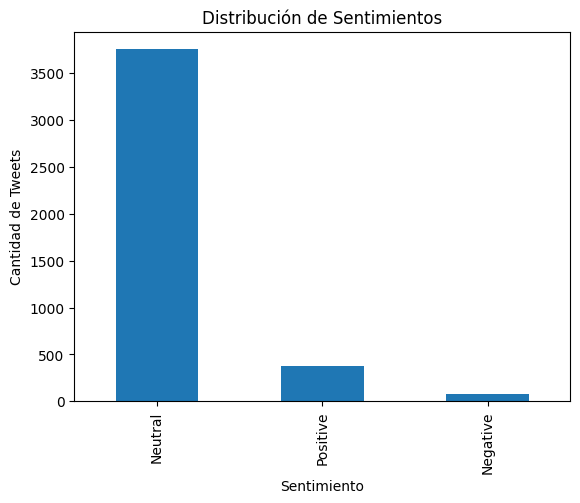

In [13]:
# Aplicar la función de sentimiento a la columna de texto limpio
df_train_messages['sentiment'] = df_train_messages['clean_message'].apply(get_sentiment)

# Mostrar la distribución de sentimientos
sentiment_distribution = df_train_messages['sentiment'].value_counts()
print(sentiment_distribution)

# Graficar la distribución de sentimientos
sentiment_distribution.plot(kind='bar', title="Distribución de Sentimientos")
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Tweets')
plt.show()

### Mostrar Topicos Principales

In [14]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Tópico {topic_idx + 1}:")  # Ajuste para que el índice del tópico sea 1-based
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(" ".join(top_words))


## Analisis de n-gramas

In [15]:
def ngram_analysis(n, text_data):
    # Vectorizamos los textos en n-gramas (sin usar stopwords ya que es en español)
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngram_data = vectorizer.fit_transform(text_data)
    
    # Convertimos a un DataFrame para contar ocurrencias
    ngram_counts = pd.DataFrame(ngram_data.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Sumamos las ocurrencias
    ngram_sum = ngram_counts.sum().sort_values(ascending=False)
    
    return ngram_sum.head(25)

In [16]:
# Asegúrate de que los mensajes preprocesados estén en formato de cadena, no listas
df_train_messages['clean_message'] = df_train_messages['clean_message'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Definir el valor de 'n' para los n-gramas (ejemplo: trigrama)
n = 1

# Aplicar el análisis de n-gramas
palabras_mas_comunes = ngram_analysis(n, df_train_messages['clean_message'])
list_palabras=list(palabras_mas_comunes.index)
# Mostrar los n-gramas más comunes
print("N-gramas más comunes:")
print(list_palabras)


N-gramas más comunes:
['barevalodeleon', 'amilcarmontejo', 'ahora', 'zona', 'msemillagt', 'traficogt', 'vía', 'tráficogt', 'drgiammattei', 'si', 'president', 'avenida', 'call', 'guatemala', 'solo', 'the', 'karinherreravp', 'má', 'pueblo', 'mmendozagt', 'you', 'mpguatemala', 'electo', 'your', 'corrupto']


In [17]:
n=3
ngrams_mas_comunes=ngram_analysis(n, df_train_messages['clean_message'])
print("N-gramas más comunes:")
print(ngrams_mas_comunes)


N-gramas más comunes:
tráficogt vía amilcarmontejo                   339
mmendozagt barevalodeleon drgiammattei         176
solo daño material                             119
material tráficogt vía                         110
daño material tráficogt                        110
zona solo daño                                 101
zona tráficogt vía                             100
luiurbina barevalodeleon msemillagt             86
avenida call zona                               84
ahora accident tránsito                         81
vía amilcarmontejo eleccionesgt                 78
call avenida zona                               66
president electo barevalodeleon                 65
asiervera aztecanoticiagt barevalodeleon        62
raulbarreragt barevalodeleon karinherreravp     51
call zona tráficogt                             46
hoy obtén título                                45
línea hoy ute                                   45
free ship on                                    43
discov th

## Nube de Palabras

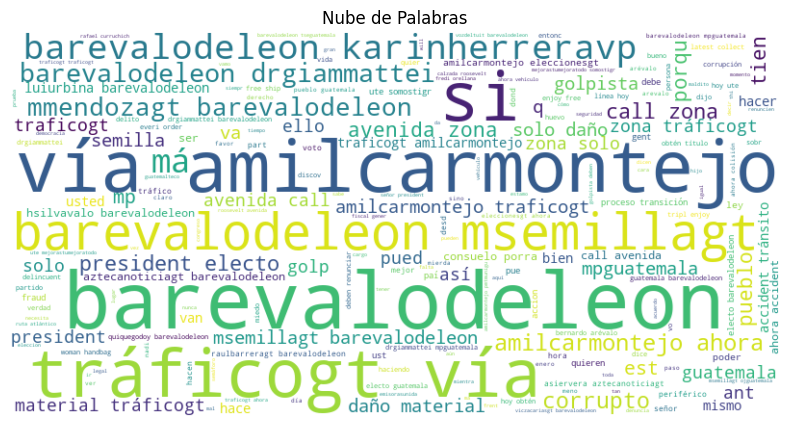

In [18]:
# Asegúrate de que los textos estén en formato de cadena, no listas
df_train_messages['clean_message'] = df_train_messages['clean_message'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Unir todos los textos preprocesados en un solo string para la nube de palabras
text_data = ' '.join(df_train_messages['clean_message'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitar los ejes
plt.title("Nube de Palabras")
plt.show()

## Analisis de Entidades

In [19]:
# Función para extraer entidades del texto
def extract_entities(text):
    # Asegurarnos de que el texto esté en formato de cadena
    if isinstance(text, list):
        text = ' '.join(text)
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [20]:
# Aplicar la función de extracción de entidades a los tweets preprocesados
bernardo_entities = df_train_messages['clean_message'].apply(extract_entities)

# Convertir los resultados en una lista plana
all_bernardo_entities = [entity for sublist in bernardo_entities for entity in sublist]

# Contar las entidades más comunes
entity_counts = Counter([entity[0] for entity in all_bernardo_entities])

# Mostrar las entidades más comunes
print(entity_counts.most_common(10))

[('barevalodeleon', 785), ('guatemala', 139), ('barevalodeleon karinherreravp', 136), ('mmendozagt barevalodeleon drgiammattei', 115), ('asiervera', 70), ('ahora', 49), ('ust', 42), ('the latest collect of woman handbag from tripl', 42), ('mmendozagt barevalodeleon', 37), ('raulbarreragt barevalodeleon karinherreravp', 34)]


## Clustering de Documentos

In [21]:
# Función para clusterizar documentos y mostrar las palabras más comunes en cada clúster
def document_clustering(text_data, n_clusters=5):
    # Asegurarnos de que los textos estén en formato de cadena
    text_data = text_data.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
    
    # Vectorizar los textos usando TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(text_data)

    # Aplicar K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    
    # Obtener las etiquetas de los clusters
    labels = kmeans.labels_

    # Mostrar las palabras más comunes en cada clúster
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    for i in range(n_clusters):
        print(f"Tópico {i+1}:")
        for ind in order_centroids[i, :10]:
            print(f" {terms[ind]}")
        print("\n")

    return labels

# Función para crear la red de co-ocurrencia de palabras
""""
def create_cooccurrence_network(text_data, min_weight=2):
    G = nx.Graph()
    for text in text_data:
        words = text.split()
        for i, word1 in enumerate(words):
            for word2 in words[i+1:i+5]:  # Definir ventana de palabras
                if G.has_edge(word1, word2):
                    G[word1][word2]['weight'] += 1
                else:
                    G.add_edge(word1, word2, weight=1)
    
    # Filtrar las conexiones por peso mínimo
    G_filtered = nx.Graph()
    for u, v, d in G.edges(data=True):
        if d['weight'] >= min_weight:  # Solo mantener relaciones con suficiente peso
            G_filtered.add_edge(u, v, weight=d['weight'])
    
    return G_filtered"""

'"\ndef create_cooccurrence_network(text_data, min_weight=2):\n    G = nx.Graph()\n    for text in text_data:\n        words = text.split()\n        for i, word1 in enumerate(words):\n            for word2 in words[i+1:i+5]:  # Definir ventana de palabras\n                if G.has_edge(word1, word2):\n                    G[word1][word2][\'weight\'] += 1\n                else:\n                    G.add_edge(word1, word2, weight=1)\n    \n    # Filtrar las conexiones por peso mínimo\n    G_filtered = nx.Graph()\n    for u, v, d in G.edges(data=True):\n        if d[\'weight\'] >= min_weight:  # Solo mantener relaciones con suficiente peso\n            G_filtered.add_edge(u, v, weight=d[\'weight\'])\n    \n    return G_filtered'

In [22]:
"""# Visualización de la red de co-ocurrencia de palabras
def visualize_cooccurrence_network(network):
    plt.figure(figsize=(14, 10))  # Aumentar el tamaño de la figura

    # Ajustar el parámetro 'k' para espaciar más los nodos, 'iterations' para mejor convergencia
    pos = nx.spring_layout(network, k=3.0, iterations=50)

    # Dibujar la red con parámetros ajustados
    nx.draw_networkx(
        network, pos,
        with_labels=True,
        node_color='lightblue', edge_color='gray', node_size=300, font_size=12, font_color='black',
        width=[d['weight'] * 0.5 for (u, v, d) in network.edges(data=True)]  # Ajustar grosor de los bordes por peso
    )

    plt.title("Red de Co-ocurrencia de Palabras", fontsize=16)
    plt.axis('off')  # Ocultar los ejes
    plt.show()"""

'# Visualización de la red de co-ocurrencia de palabras\ndef visualize_cooccurrence_network(network):\n    plt.figure(figsize=(14, 10))  # Aumentar el tamaño de la figura\n\n    # Ajustar el parámetro \'k\' para espaciar más los nodos, \'iterations\' para mejor convergencia\n    pos = nx.spring_layout(network, k=3.0, iterations=50)\n\n    # Dibujar la red con parámetros ajustados\n    nx.draw_networkx(\n        network, pos,\n        with_labels=True,\n        node_color=\'lightblue\', edge_color=\'gray\', node_size=300, font_size=12, font_color=\'black\',\n        width=[d[\'weight\'] * 0.5 for (u, v, d) in network.edges(data=True)]  # Ajustar grosor de los bordes por peso\n    )\n\n    plt.title("Red de Co-ocurrencia de Palabras", fontsize=16)\n    plt.axis(\'off\')  # Ocultar los ejes\n    plt.show()'

In [23]:
# Aplicación de la clusterización y visualización de la red
# Asumiendo que los textos preprocesados están en df_train_messages['clean_message']
text_data = df_train_messages['clean_message']


# Clusterizar los documentos y mostrar los términos clave en cada clúster
document_clustering(text_data, n_clusters=6)



Tópico 1:
 inteligencia
 capaz
 incertidumbr
 cantidad
 encontrar
 abogad
 estratega
 cerebro
 valer
 creativa


Tópico 2:
 vía
 tráficogt
 zona
 ahora
 avenida
 amilcarmontejo
 call
 daño
 material
 solo


Tópico 3:
 barevalodeleon
 msemillagt
 si
 corrupto
 má
 luiurbina
 aztecanoticiagt
 hsilvavalo
 asiervera
 mp


Tópico 4:
 drgiammattei
 barevalodeleon
 president
 mmendozagt
 electo
 mpguatemala
 golpista
 transición
 proceso
 guatemala


Tópico 5:
 traficogt
 amilcarmontejo
 the
 you
 zona
 your
 on
 of
 hoy
 hora


Tópico 6:
 karinherreravp
 pueblo
 barevalodeleon
 raulbarreragt
 quiquegodoy
 guatemala
 msemillagt
 si
 usted
 president




array([2, 2, 2, ..., 4, 4, 4])

## Modelado de topicos con LDA

In [46]:
def lda_analysis(text_data, n_topics=5):
    # Custom Spanish stop words
    spanish_stop_words = [
        'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'las', 'se', 
        'no', 'un', 'por', 'con', 'una', 'su', 'para', 'es', 'al', 'lo', 
        'como', 'pero', 'más', 'sus', 'sobre', 'este', 'ya', 'entre', 'sin', 
        'su', 'al', 'los', 'las', 'me', 'mi', 'te', 'tu', 'le', 'nos', 
        'os', 'les', 'si', 'ella', 'él', 'ellas', 'ellos'
    ]

    # Vectorizar los textos con los stop words en español
    count_vectorizer = CountVectorizer(stop_words=spanish_stop_words)
    count_data = count_vectorizer.fit_transform(text_data)

    # Ajustar el modelo LDA
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(count_data)

    # Mostrar los tópicos principales
    topics = display_topics(lda, count_vectorizer.get_feature_names_out(), 10)
    
    return topics

def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(f"Tópico {topic_idx + 1}: " + " ".join(topic_words))
    return topics

In [47]:
topics = lda_analysis(df_train_messages['clean_message'], n_topics=5)
for topic in topics:
    print(topic)

Tópico 1: amilcarmontejo zona ahora vía tráficogt traficogt avenida call solo vehículo
Tópico 2: barevalodeleon president msemillagt electo drgiammattei transición proceso mpguatemala arévalo golpista
Tópico 3: the you your and to in of it for is
Tópico 4: barevalodeleon msemillagt drgiammattei karinherreravp pueblo mmendozagt má guatemala mpguatemala van
Tópico 5: barevalodeleon má hoy the corrupto karinherreravp guatemala msemillagt on of


### Analisis de Co-Ocurrencia

In [33]:
def create_cooccurrence_network(text_data, palabras_comunes, min_weight=2):
    G = nx.Graph()

#Convertir la lista de palabras comunes en un conjunto para acelerar las búsquedas
    palabras_comunes_set = set(palabras_comunes)

    for text in text_data:
        words = text.split()

#Filtrar las palabras que no están en palabras_comunes
        filtered_words = [word for word in words if word in palabras_comunes_set]

        for i, word1 in enumerate(filtered_words):
            for word2 in filtered_words[i+1:i+5]:  # Definir ventana de palabras
                if G.has_edge(word1, word2):
                    G[word1][word2]['weight'] += 1
                else:
                    G.add_edge(word1, word2, weight=1)

#Filtrar las conexiones por peso mínimo
    G_filtered = nx.Graph()
    for u, v, d in G.edges(data=True):
        if d['weight'] >= min_weight:  # Solo mantener relaciones con suficiente peso
            G_filtered.add_edge(u, v, weight=d['weight'])

    return G_filtered

def visualize_cooccurrence_network(network):
    plt.figure(figsize=(12, 9))  # Aumentar el tamaño de la figura

    # Ajustar el parámetro 'k' para espaciar más los nodos, 'iterations' para mejor convergencia
    pos = nx.spring_layout(network, k=40.0, iterations=150)

    # Dibujar los nodos con mayor transparencia
    nx.draw_networkx_nodes(
        network, pos,
        node_color='lightblue', node_size=3500, alpha=0.9  # Aumentar el tamaño y transparencia de los nodos
    )
    nx.draw_networkx_edges(
        network, pos,
        edge_color='gray', width=[d['weight'] * 0.01 for (u, v, d) in network.edges(data=True)], alpha=1
    )

    # Dibujar las etiquetas de los nodos con tamaño de fuente más grande
    nx.draw_networkx_labels(
        network, pos,
        font_size=14, font_color='black', font_weight='bold'
    )

    plt.title("Red de Co-ocurrencia de Palabras", fontsize=18)
    plt.axis('off')  # Ocultar los ejes
    plt.show()

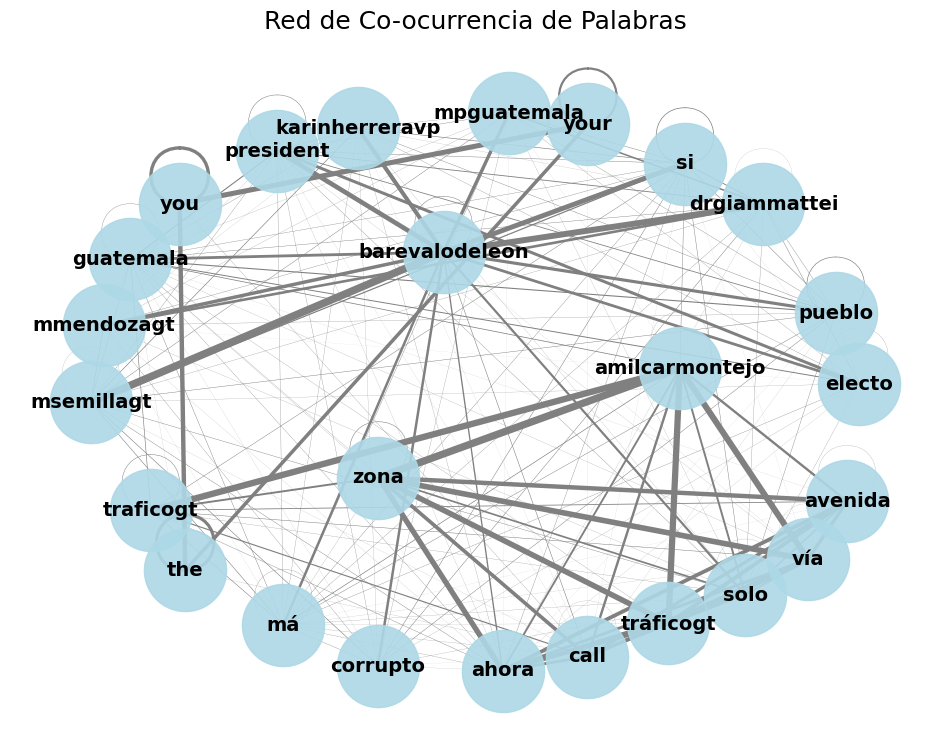

In [34]:
# Crear y visualizar la red de co-ocurrencia
cooccurrence_network = create_cooccurrence_network(text_data,list_palabras, min_weight=4)
visualize_cooccurrence_network(cooccurrence_network)

In [35]:
#Visualización de la red de co-ocurrencia con solo las conexiones de 40% o más del peso mayor
def visualize_cooccurrence_network_filtered(network):
    plt.figure(figsize=(12, 9))  # Aumentar el tamaño de la figura

    # Obtener el peso máximo de las conexiones
    edge_weights = nx.get_edge_attributes(network, 'weight').values()
    max_weight = max(edge_weights)
    threshold_weight = 0.4 * max_weight  # 40% del peso máximo

    # Ajustar el parámetro 'k' para espaciar más los nodos
    pos = nx.spring_layout(network, k=40.0, iterations=150)

    # Dibujar los nodos
    nx.draw_networkx_nodes(
        network, pos,
        node_color='lightblue', node_size=2500, alpha=0.9  # Ajustar tamaño y transparencia de los nodos
    )

    # Dibujar las aristas que cumplen con el criterio de peso >= 40% del máximo
    filtered_edges = [(u, v) for u, v, d in network.edges(data=True) if d['weight'] >= threshold_weight]
    nx.draw_networkx_edges(
        network, pos,
        edgelist=filtered_edges,  # Solo dibujar las aristas filtradas
        edge_color='gray', width=1  # Grosor fijo para las aristas filtradas
    )

    # Mostrar las etiquetas de los nodos
    nx.draw_networkx_labels(
        network, pos,
        font_size=14, font_color='black', font_weight='bold'
    )

#Mostrar los pesos de las aristas filtradas como texto sobre las líneas
    edge_labels = {(u, v): d['weight'] for u, v, d in network.edges(data=True) if d['weight'] >= threshold_weight}
    nx.draw_networkx_edge_labels(
        network, pos,
        edge_labels=edge_labels,
        font_color='red', font_size=10  # Ajustar el color y tamaño de la fuente
    )

    plt.title("Red de Co-ocurrencia (Pesos >= 40% del Máximo)", fontsize=18)
    plt.axis('off')  # Ocultar los ejes
    plt.show()

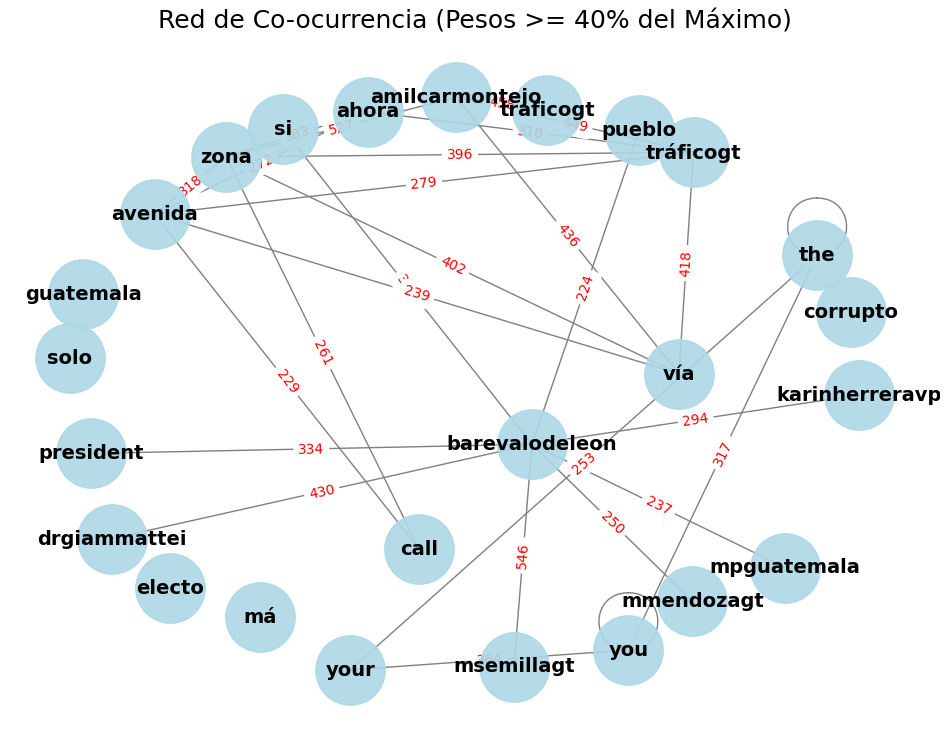

In [36]:
cooccurrence_network = create_cooccurrence_network(text_data,list_palabras, min_weight=4)
visualize_cooccurrence_network_filtered(cooccurrence_network)

In [37]:
#top 60% relaciones por peso
#Visualización de la red de co-ocurrencia con solo las conexiones de 40% o más del peso mayor y grosor proporcional
def visualize_cooccurrence_network_combined(network):
    plt.figure(figsize=(12, 9))  # Aumentar el tamaño de la figura

    # Obtener el peso máximo de las conexiones
    edge_weights = nx.get_edge_attributes(network, 'weight').values()
    max_weight = max(edge_weights)
    threshold_weight = 0.4 * max_weight  # 40% del peso máximo

    # Ajustar el parámetro 'k' para espaciar más los nodos, 'iterations' para mejor convergencia
    pos = nx.spring_layout(network, k=40.0, iterations=150)

    # Dibujar los nodos con mayor transparencia
    nx.draw_networkx_nodes(
        network, pos,
        node_color='lightblue', node_size=3500, alpha=0.9  # Aumentar el tamaño y transparencia de los nodos
    )

#Filtrar las aristas que cumplen con el criterio de peso >= 40% del máximo
    filtered_edges = [(u, v, d) for u, v, d in network.edges(data=True) if d['weight'] >= threshold_weight]

    # Dibujar las aristas con grosor proporcional al peso, solo las filtradas
    nx.draw_networkx_edges(
        network, pos,
        edgelist=[(u, v) for u, v, d in filtered_edges],  # Solo dibujar las aristas filtradas
        edge_color='gray', width=[d['weight'] * 0.01 for (u, v, d) in filtered_edges], alpha=1  # Grosor proporcional
    )

    # Dibujar las etiquetas de los nodos con tamaño de fuente más grande
    nx.draw_networkx_labels(
        network, pos,
        font_size=14, font_color='black', font_weight='bold'
    )

    plt.title("Red de Co-ocurrencia (Pesos >= 40% del Máximo)", fontsize=18)
    plt.axis('off')  # Ocultar los ejes
    plt.show()

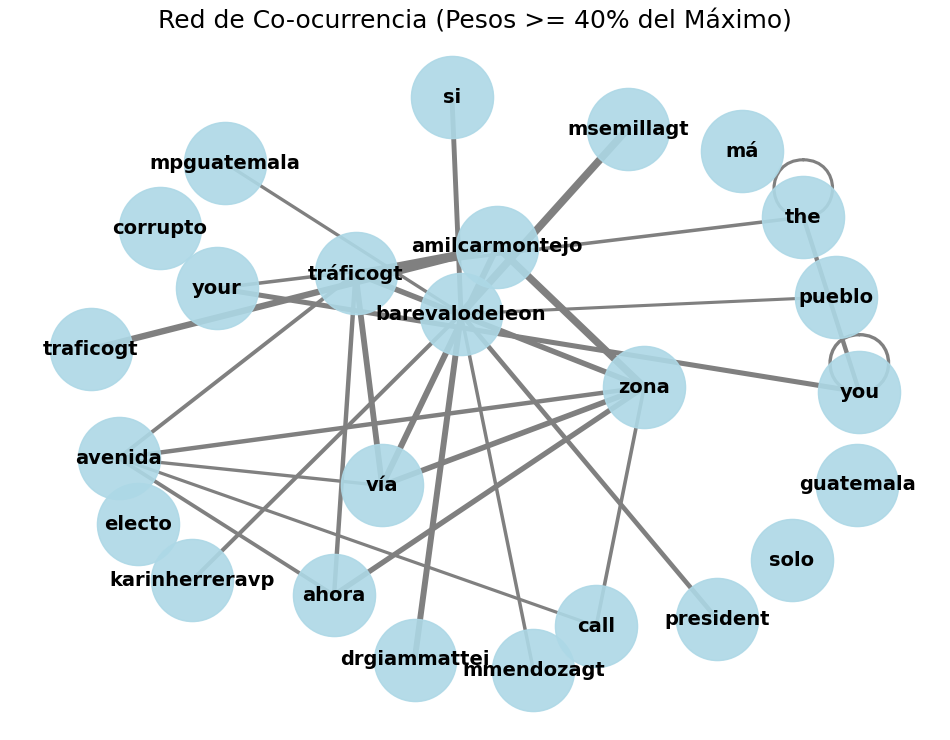

In [38]:
visualize_cooccurrence_network_combined(cooccurrence_network)